In [1]:

from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
from tensorflow.keras.constraints import max_norm

import pandas as pd

In [2]:
import pandas as pd

first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g_onely_main.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_genec_only_main_14.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('Adera_Complete_data_base_10_july_v1_2_38pm.txt',delimiter=',',engine='python')

first_data_adera

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
2,A4GNT,AMP,6.0,3,138123713.0,138132390.0,3,Esophageal_Adenocarcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12980,ZUP1,HOMDEL,6.5,6,116635618.0,116668794.0,3,Prostate_Adenocarcinoma
12981,ZUP1,HOMDEL,6.3,6,116635618.0,116668794.0,3,Uveal Melanoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [3]:
first_data_adera1= first_data_adera.dropna(axis = 0, how ='any')
first_data_adera1
#first_data_adera2 = first_data_adera1.sort_values(by=['Freq'], ascending=[ False])
first_data_adera3 = first_data_adera1.sort_values(by=['Gene', 'Cancer_type', 'Freq'], ascending=[True, True, False])
first_data_adera3
first_data_adera4 = first_data_adera3.drop_duplicates(subset=['Gene'], keep='first')
first_data_adera4

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
7,AADACL2,AMP,8.2,3,151733916.0,151761339.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12977,ZSWIM4,AMP,12.1,19,13795443.0,13832254.0,77,Serous_Ovarian_Cancer
12978,ZSWIM7,AMP,9.1,17,15976560.0,15999717.0,3,Sarcoma
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [4]:
first_data_adera4["Cancer_type"].unique()

array(['Testicular_Germ_Cell_Tumors', 'Cervical_Squamous_Cell_Carcinoma',
       'Renal_Clear_Cell_Carcinoma', 'Serous_Ovarian_Cancer',
       'Colorectal_Adenocarcinoma', 'Esophageal_Adenocarcinoma',
       'Breast_Invasive_Ductal_Carcinoma',
       'Diffuse_Large B-Cell_Lymphoma', 'Cholangiocarcinoma',
       'Uveal Melanoma', 'Bladder_Urothelial_Carcinoma', 'Sarcoma',
       'Liver_Hepatocellular_Carcinoma', 'Adrenocortical_Carcinoma',
       'Prostate_Adenocarcinoma', 'Lung', 'Glioblastoma_Multiforme',
       'Brain_Lower_Grade_Glioma', 'Head_and_Neck_Squamous',
       'Skin_Cutaneous_Melanoma'], dtype=object)

In [5]:
First_data_adera3a= first_data_adera4[first_data_adera3['Cancer_type'] == 'Cervical_Squamous_Cell_Carcinoma']
First_data_adera3b1= first_data_adera4[first_data_adera3['Cancer_type'] == 'Serous_Ovarian_Cancer']
#First_data_adera3b2= first_data_adera4[first_data_adera3['Cancer_type'] == 'Breast_Invasive_Ductal_Carcinoma']
#First_data_adera3b3= first_data_adera4[first_data_adera3['Cancer_type'] == 'Uterine_Corpus_Endometrial_Carcinoma']

#First_data_adera3c = pd.concat([First_data_adera3a, First_data_adera3b1,First_data_adera3b2,First_data_adera3b3])
First_data_adera3c = pd.concat([First_data_adera3a, First_data_adera3b1])

C:\Users\hp\AppData\Local\Temp\ipykernel_12808\3939794659.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  First_data_adera3a= first_data_adera4[first_data_adera3['Cancer_type'] == 'Cervical_Squamous_Cell_Carcinoma']
C:\Users\hp\AppData\Local\Temp\ipykernel_12808\3939794659.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  First_data_adera3b1= first_data_adera4[first_data_adera3['Cancer_type'] == 'Serous_Ovarian_Cancer']


In [6]:
First_data_adera3c

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
7,AADACL2,AMP,8.2,3,151733916.0,151761339.0,77,Cervical_Squamous_Cell_Carcinoma
10,AADACL2-AS1,AMP,8.2,3,151751443.0,151928175.0,3,Cervical_Squamous_Cell_Carcinoma
13,AADACP1,AMP,8.2,3,151770396.0,151784945.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12960,ZNF862,AMP,7.2,7,149838375.0,149867479.0,77,Serous_Ovarian_Cancer
12961,ZNF875,AMP,7.3,19,37312837.0,37369365.0,77,Serous_Ovarian_Cancer
12962,ZNF878,AMP,7.5,19,12043805.0,12052961.0,3,Serous_Ovarian_Cancer
12977,ZSWIM4,AMP,12.1,19,13795443.0,13832254.0,77,Serous_Ovarian_Cancer


In [7]:
import tensorflow.keras
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(First_data_adera3c["CNA"])
Adera_CNA= encoder.transform(First_data_adera3c["CNA"])

Adera_CNA1= to_categorical(Adera_CNA,num_classes=4)
#type(first_data_adera["Freq"])
#Adera_CNA1=first_data_adera['CNA']
Adera_CNA1.shape #rember to update because there are genes written in one or more diseases.
Adera_CNA1
type(First_data_adera3c ['CNA'])

#Input_net_Adera = np.concatenate((Adera_freq.T,Adera_CNA1), axis=None)
#Input_net_Adera1=Input_net_Adera.reshape(5,6918).T

Input_net_Adera1=Adera_CNA1
Input_net_Adera1.shape # number of samples,number of 4 states
Adera_chromosome=First_data_adera3c['chromosome']
Adera_chromosome1=np.array(Adera_chromosome)
Adera_chromosome2=Adera_chromosome1.reshape(Input_net_Adera1.shape[0],1)

Adera_start=First_data_adera3c['start']
Adera_start1=np.array(Adera_start)
Adera_start2=Adera_start1.reshape(Input_net_Adera1.shape[0],1)

Adera_end=First_data_adera3c['end']
Adera_end1=np.array(Adera_end)
Adera_end2=Adera_end1.reshape(Input_net_Adera1.shape[0],1)

Adera_strand=First_data_adera3c['strand']
Adera_strand1=np.array(Adera_strand)
Adera_strand2=Adera_strand1.reshape(Input_net_Adera1.shape[0],1)

Adera_freq=First_data_adera3c['Freq']
Adera_freq1=np.array(Adera_freq)
Adera_freq2=Adera_freq1.reshape(Input_net_Adera1.shape[0],1)
#normalise chromsoem numbers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_chromosome3 = Adera_chromosome2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_chromosome4= scaler.fit_transform(Adera_chromosome3)



#####normalise start values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_start3 = Adera_start2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_start4= scaler.fit_transform(Adera_start3)

####normalise end values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_end3 = Adera_end2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_end4= scaler.fit_transform(Adera_end3)

######normalise stand
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_strand3 = Adera_strand2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_strand4= scaler.fit_transform(Adera_strand3)
Adera_chromosome4.shape
k1=First_data_adera3c["Cancer_type"].unique()
k1.shape[0]
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,adera_matrix), axis=1)
Adera_CNA1
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome2,Adera_start2,Adera_end2,Adera_strand2,Adera_freq2), axis=1)
Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome4,Adera_start4,Adera_end4,Adera_strand4), axis=1)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_start2,Adera_end2), axis=1)
#Input_net_Adera2=adera_matrix
Input_net_Adera2.shape
Output_net_Adera=First_data_adera3c[["Cancer_type"]]
Output_net_Adera

from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(Output_net_Adera)
#Output_net_Adera1 = encoder.transform(Output_net_Adera)

#Output_net_Adera1 = np_utils.to_categorical(Output_net_Adera1,num_classes=3)
#Output_net_Adera1



encoder = LabelEncoder()
encoder.fit(First_data_adera3c[["Cancer_type"]])
Output_net_Adera1 = encoder.transform(First_data_adera3c[["Cancer_type"]])

Output_net_Adera2=to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])





c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [8]:
First_data_adera3c["Cancer_type"].unique()

array(['Cervical_Squamous_Cell_Carcinoma', 'Serous_Ovarian_Cancer'],
      dtype=object)

In [9]:

Output_net_Adera2= to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])
Output_net_Adera2.shape
Output_net_Adera2
Input_Adera_numpy2=Input_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,8) #7 input values

Output_net_Adera3=Output_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,k1.shape[0]) #7 cancer types
Output_net_Adera3.shape

(1546, 1, 1, 2)

In [10]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import SpecificityAtSensitivity, AUC
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras import regularizers
import numpy as np
Output_net_Adera3.shape

(1546, 1, 1, 2)

In [11]:
#result_file = open("results_adera1.txt", "w")
#result_file.write(" test_adera")
#result_file.close()

In [12]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras import regularizers
es_ADERA = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=300)

from random import sample

class_0_indices = np.where(Output_net_Adera3 == 0)[0]
class_1_indices = np.where(Output_net_Adera3 == 1)[0]

num_samples_class_0 = len(class_0_indices)
num_samples_class_1 = len(class_1_indices)

target_size = min(num_samples_class_0, num_samples_class_1)

undersampled_indices = np.concatenate([
    sample(class_0_indices.tolist(), target_size),
    class_1_indices
])

Input_Adera_undersampled = Input_Adera_numpy2[undersampled_indices]
Output_net_Adera_undersampled = Output_net_Adera3[undersampled_indices]




grace_model = tf.keras.Sequential([

 #tf.keras.layers.Dense(2, activation='softmax'),
 tf.keras.layers.Dense(128, activation='relu'),
 #tf.keras.layers.Dense(2, activation='softmax'),
 tf.keras.layers.Dense(2, activation='softplus')


      ])





optimizer_Adera=tf.keras.optimizers.Adamax(learning_rate=2*1e-3, clipnorm = .08)
grace_model.compile(optimizer=optimizer_Adera, loss='CategoricalFocalCrossentropy', metrics=[ 'accuracy', SpecificityAtSensitivity(0.5),AUC()  ])
#grace_model.compile(optimizer=optimizer_Adera, loss='binary_crossentropy', metrics=['accuracy'])
k_adera = grace_model.fit(Input_Adera_undersampled, Output_net_Adera_undersampled, verbose=1, validation_split=0.49, epochs=50, batch_size=250, callbacks=[es_ADERA])
#k_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=200,batch_size=10, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=350,batch_size=250, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8

Epoch 1/50
7/7 [==============================] - 2s 113ms/step - loss: 0.0474 - accuracy: 0.3541 - specificity_at_sensitivity: 0.2862 - auc: 0.3749 - val_loss: 0.0406 - val_accuracy: 0.6352 - val_specificity_at_sensitivity: 0.7361 - val_auc: 0.6812
Epoch 2/50
7/7 [==============================] - 0s 18ms/step - loss: 0.0383 - accuracy: 0.6916 - specificity_at_sensitivity: 0.7843 - auc: 0.7483 - val_loss: 0.0343 - val_accuracy: 0.8094 - val_specificity_at_sensitivity: 0.8503 - val_auc: 0.8450
Epoch 3/50
7/7 [==============================] - 0s 18ms/step - loss: 0.0330 - accuracy: 0.8154 - specificity_at_sensitivity: 0.8484 - auc: 0.8600 - val_loss: 0.0298 - val_accuracy: 0.8734 - val_specificity_at_sensitivity: 0.9927 - val_auc: 0.9193
Epoch 4/50
7/7 [==============================] - 0s 18ms/step - loss: 0.0289 - accuracy: 0.8566 - specificity_at_sensitivity: 0.9930 - auc: 0.9262 - val_loss: 0.0264 - val_accuracy: 0.8819 - val_specificity_at_sensitivity: 0.9927 - val_auc: 0.9465
Epo

In [13]:
grace_model.save("adera+fs++softplus+98+98Makarious") # first model for female specific diseases
adera_47_40_model = tf.keras.saving.load_model("adera+fs++softplus+98+98Makarious") # first model for female specific diseases

INFO:tensorflow:Assets written to: adera+fs++softplus+98+98Makarious\assets


INFO:tensorflow:Assets written to: adera+fs++softplus+98+98Makarious\assets


4/4 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.9521 - specificity_at_sensitivity: 0.9825 - auc: 0.9780


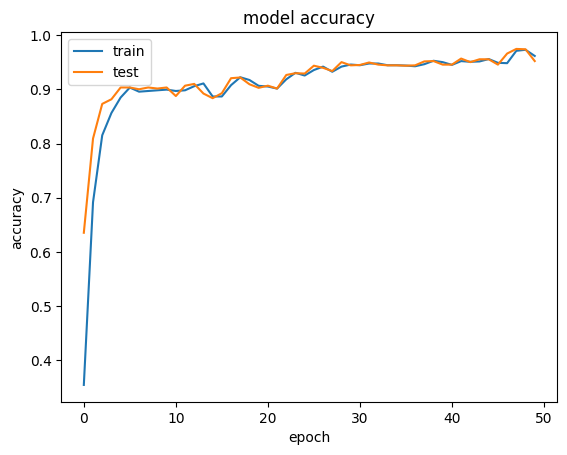

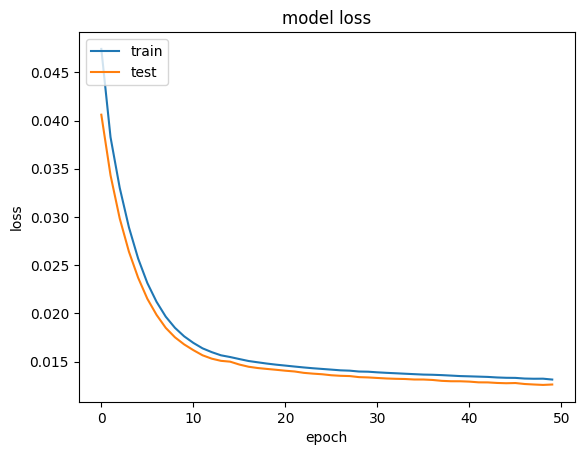

In [14]:
#print(k_adera.history.keys())
#print(k_adera.history['val_loss'])
#print(k_adera.history['val_accuracy'])
#print(k_adera.history['mape'])
results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)
# summarize history for accuracy
plt.plot(k_adera.history['accuracy'])
plt.plot(k_adera.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
axes = plt.gca()
#axes.set_ylim([-0.005,0.005])
plt.plot(k_adera.history['loss'])
plt.plot(k_adera.history['val_loss'])
#########################
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.title('model mape')
#plt.plot(k_adera.history['mean_squared_error'])
#plt.plot(k_adera.history['val_mape'])
#plt.plot(k_adera.history['mape'])
#plt.ylabel('mape')
#plt.xlabel('epoch')
#plt.show()
#plt.title('model mae')
#plt.plot(k_adera.history['val_mae'])
#plt.plot(k_adera.history['mae'])
#plt.show()

In [15]:
# prompt: results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)

results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)
print(results)


4/4 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.9521 - specificity_at_sensitivity: 0.9825 - auc: 0.9780
[0.01287184190005064, 0.9521345496177673, 0.9825356006622314, 0.9780434966087341]


KeyError: 'specificity_at_sensitivity_3'

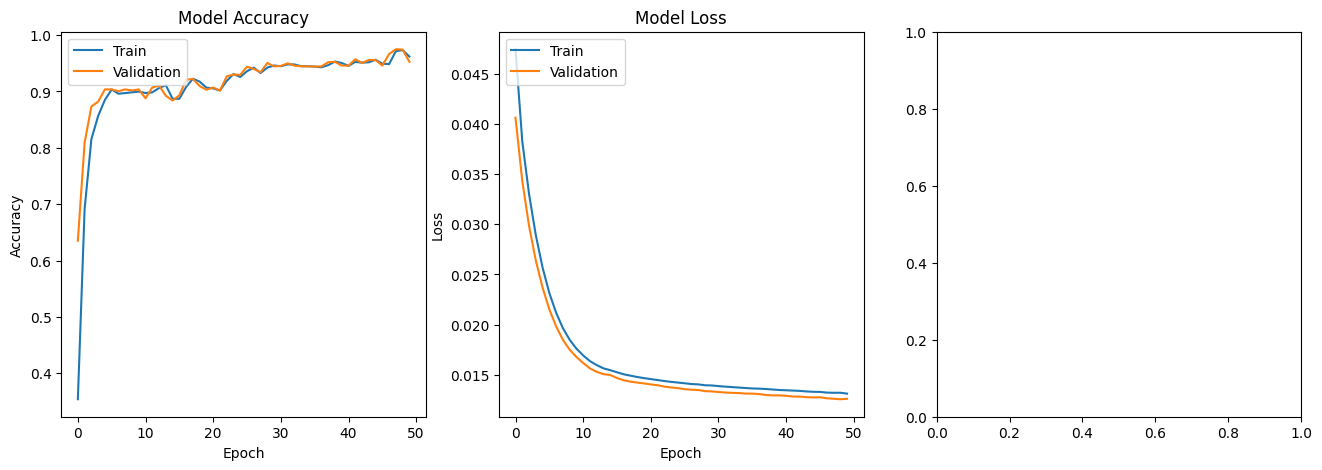

In [17]:
# Plotting multiple metrics
plt.figure(figsize=(16, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(k_adera.history['accuracy'])
plt.plot(k_adera.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
plt.subplot(1, 3, 2)
plt.plot(k_adera.history['loss'])
plt.plot(k_adera.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Specificity at Sensitivity 0.5
plt.subplot(1, 3, 3)
plt.plot(k_adera.history['specificity_at_sensitivity_3'])
plt.plot(k_adera.history['val_specificity_at_sensitivity_3'])
plt.title('Specificity at Sensitivity 0.5')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plot AUC
plt.figure(figsize=(8, 5))
plt.plot(k_adera.history['auc_2'])
plt.plot(k_adera.history['val_auc_2'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
#hyper parameter

import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.05))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='elu'))
    model.add(tf.keras.layers.Dense(64, activation='selu'))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    optimizer = keras.optimizers.Adam(
        learning_rate=hp.Choice('learning_rate', [0.001, 0.0001, 0.00001]),
        clipnorm=hp.Choice('clipnorm', [0.1, 0.2, 0.3])
    )

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_directory',
    project_name='my_model_adera'
)

tuner.search(
    x=Input_Adera_numpy2,
    y=Output_net_Adera3,
    validation_split=0.25,
    epochs=20,
    batch_size=128
)

# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_learning_rate = best_hyperparameters.get('learning_rate')
best_clipnorm = best_hyperparameters.get('clipnorm')

print("Best Learning Rate:", best_learning_rate)
print("Best Clipnorm:", best_clipnorm)


Trial 2 Complete [00h 00m 01s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 03s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
1e-05             |0.0001            |learning_rate
0.2               |0.1               |clipnorm

Epoch 1/20


Traceback (most recent call last):
  File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_tuner-1.4.7-py3.8.egg\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_tuner-1.4.7-py3.8.egg\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_tuner-1.4.7-py3.8.egg\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_tuner-1.4.7-py3.8.egg\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "c

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_tuner-1.4.7-py3.8.egg\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_tuner-1.4.7-py3.8.egg\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_tuner-1.4.7-py3.8.egg\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_tuner-1.4.7-py3.8.egg\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_tuner-1.4.7-py3.8.egg\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\hp\AppData\Local\Temp\__autograph_generated_file7fo7qvtt.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1, 1, 2) and (None, 1, 1, 4) are incompatible



In [ ]:
########without graphs##### grid search for the best paparmeters
import tensorflow as tf
from tensorflow import keras

# Define the grid of hyperparameters to search
batch_sizes = [32, 64,128,256]
learning_rates = [0.00001, 0.0001,0.001,0.01]
clip_norms = [0.2, 0.4, 0.6,0.8]
validation_split=[0.1,0.4,0.7,0.9]

best_validation_loss = float('inf')
best_validation_accuracy = 0.0
best_batch_size = None
best_learning_rate = None
best_clip_norm = None

# Perform the grid search
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for clip_norm in clip_norms:
            grace_model = tf.keras.Sequential([
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(128, activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.05),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dense(128, activation='elu'),
                tf.keras.layers.Dense(64, activation='selu'),
                tf.keras.layers.Dense(4, activation='softmax')
            ])

            optimizer_Adera = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=clip_norm)
            grace_model.compile(optimizer=optimizer_Adera, loss='categorical_crossentropy', metrics=['accuracy'])

            es_ADERA = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

            k_adera = grace_model.fit(
                Input_Adera_numpy2, Output_net_Adera3,
                verbose=1, validation_split=0.25, epochs=20, batch_size=batch_size, callbacks=[es_ADERA]
            )

            # Check if the current hyperparameters yield better validation loss or accuracy
            current_validation_loss = k_adera.history['val_loss'][-1]
            current_validation_accuracy = k_adera.history['val_accuracy'][-1]

            if current_validation_loss < best_validation_loss and current_validation_accuracy > best_validation_accuracy:
                best_validation_loss = current_validation_loss
                best_validation_accuracy = current_validation_accuracy
                best_batch_size = batch_size
                best_learning_rate = learning_rate
                best_clip_norm = clip_norm

# Print the best hyperparameters found
print("Best Batch Size:", best_batch_size)
print("Best Learning Rate:", best_learning_rate)
print("Best Clip Norm:", best_clip_norm)
print("best_validation_accuracy",best_validation_accuracy)
print("best_validation_loss",best_validation_loss)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Define the grid of hyperparameters to search
batch_sizes = [32, 64, 128, 256]
learning_rates = [0.00001, 0.0001, 0.001, 0.01]
clip_norms = [0.2, 0.4, 0.6, 0.8]
validation_splits = [0.1, 0.4, 0.7, 0.9]

best_validation_loss = float('inf')
best_validation_accuracy = 0.0
best_batch_size = None
best_learning_rate = None
best_clip_norm = None
best_validation_split = None

# Lists to store results
batch_sizes_results = []
learning_rates_results = []
clip_norms_results = []
validation_splits_results = []
validation_accuracy_results = []
validation_loss_results = []

# Perform the grid search
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for clip_norm in clip_norms:
            for validation_split in validation_splits:
                grace_model = tf.keras.Sequential([
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.BatchNormalization(),
                    tf.keras.layers.Dropout(0.05),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dense(128, activation='elu'),
                    tf.keras.layers.Dense(64, activation='selu'),
                    tf.keras.layers.Dense(4, activation='softmax')
                ])

                optimizer_Adera = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=clip_norm)
                grace_model.compile(optimizer=optimizer_Adera, loss='categorical_crossentropy', metrics=['accuracy'])

                es_ADERA = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

                k_adera = grace_model.fit(
                    Input_Adera_numpy2, Output_net_Adera3,
                    verbose=1, validation_split=validation_split, epochs=20, batch_size=batch_size,
                    callbacks=[es_ADERA]
                )

                # Check if the current hyperparameters yield better validation loss or accuracy
                current_validation_loss = k_adera.history['val_loss'][-1]
                current_validation_accuracy = k_adera.history['val_accuracy'][-1]

                if current_validation_loss < best_validation_loss and current_validation_accuracy > best_validation_accuracy:
                    best_validation_loss = current_validation_loss
                    best_validation_accuracy = current_validation_accuracy
                    best_batch_size = batch_size
                    best_learning_rate = learning_rate
                    best_clip_norm = clip_norm
                    best_validation_split = validation_split

                # Store results
                batch_sizes_results.append(batch_size)
                learning_rates_results.append(learning_rate)
                clip_norms_results.append(clip_norm)
                validation_splits_results.append(validation_split)
                validation_accuracy_results.append(current_validation_accuracy)
                validation_loss_results.append(current_validation_loss)

# Print the best hyperparameters found
print("Best Batch Size:", best_batch_size)
print("Best Learning Rate:", best_learning_rate)
print("Best Clip Norm:", best_clip_norm)
print("Best Validation Split:", best_validation_split)
print("Best Validation Accuracy:", best_validation_accuracy)
print("Best Validation Loss:", best_validation_loss)



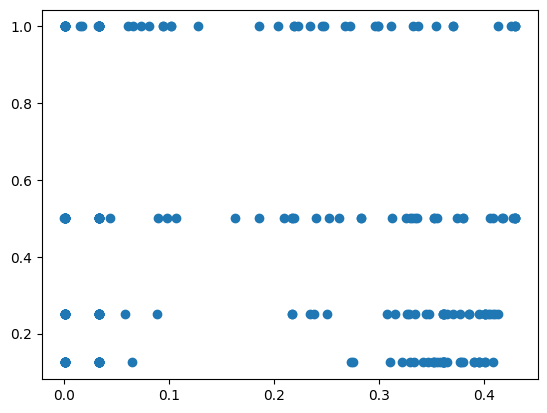

In [ ]:
# Normalize the hyperparameter values
batch_sizes_normalized = np.array(batch_sizes_results) / max(batch_sizes)
learning_rates_normalized = np.array(learning_rates_results) / max(learning_rates)
clip_norms_normalized = np.array(clip_norms_results) / max(clip_norms)
validation_splits_normalized = np.array(validation_splits_results) / max(validation_splits)

# Plotting the results
#plt.figure(figsize=(12, 6))
#plt.errorbar(batch_sizes_normalized, validation_accuracy_results, fmt='o', color='b', label='Validation Accuracy')
#plt.xticks([0.25, 0.5, 0.75, 1.0], ['Batch Size', 'Learning Rate', 'Clip Norm', 'Validation Split'])
#plt.xlabel('Hyperparameters')
#plt.ylabel('Validation Accuracy')
#plt.title('Hyperparameters vs. Validation Accuracy')
#plt.legend()
#plt.grid(True)
#plt.show()

plt.figure()
plt.plot(validation_accuracy_results,batch_sizes_normalized,'o')
plt.show()

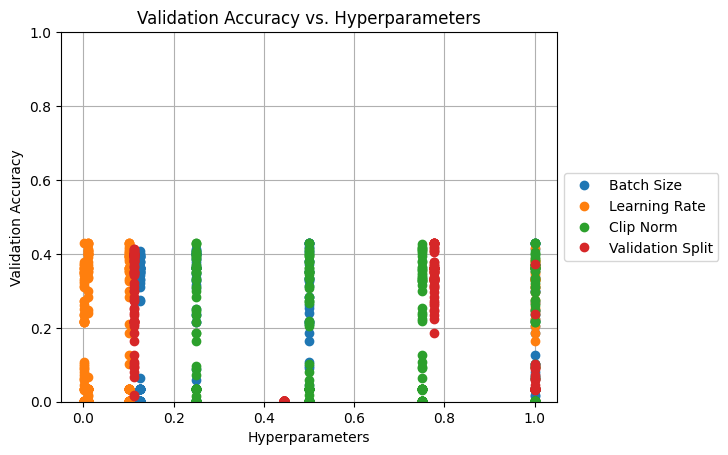

In [ ]:
plt.figure()
plt.plot( batch_sizes_normalized, validation_accuracy_results,'o', label='Batch Size')
plt.plot( learning_rates_normalized, validation_accuracy_results,'o', label='Learning Rate')
plt.plot( clip_norms_normalized,validation_accuracy_results, 'o', label='Clip Norm')
plt.plot( validation_splits_normalized,validation_accuracy_results, 'o', label='Validation Split')
plt.ylabel('Validation Accuracy')
plt.xlabel('Hyperparameters')
plt.title('Validation Accuracy vs. Hyperparameters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [ ]:
#plt.figure(figsize=(12, 6))
#plt(batch_sizes_normalized, validation_accuracy_results, fmt='o', color='b', label='Validation Accuracy')
#plt.xticks([0.25, 0.5, 0.75, 1.0], ['Batch Size', 'Learning Rate', 'Clip Norm', 'Validation Split'])
#p#lt.xlabel('Hyperparameters')
#plt.ylabel('Validation Accuracy')
#plt.title('Hyperparameters vs. Validation Accuracy')
#plt.legend()
#plt.grid(True)
#plt.show()

In [ ]:
#Study the effect of batch size
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

batch_sizes = [10, 50, 100, 200, 300, 500, 600]  # Define different batch sizes to test
validation_loss = []

for batch_size in batch_sizes:
    grace_model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='elu'),
        tf.keras.layers.Dense(64, activation='selu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

    optimizer_Adera = tf.keras.optimizers.Adam(learning_rate=0.002, clipnorm=0.2)
    grace_model.compile(optimizer=optimizer_Adera, loss='categorical_crossentropy', metrics=['accuracy'])

    es_ADERA = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

    k_adera = grace_model.fit(
        Input_Adera_numpy2, Output_net_Adera3,
        verbose=1, validation_split=0.25, epochs=80, batch_size=batch_size, callbacks=[es_ADERA]
    )

    validation_loss.append(k_adera.history['val_loss'][-1])

# Plotting batch size vs. validation loss
plt.plot(batch_sizes, validation_loss, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Validation Loss')
plt.title('Effect of Batch Size on Validation Loss')
plt.grid(True)
plt.show()





In [ ]:

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
#grace_model.save("adera+99+99b+exec2+sigmoid85+86+Makarious") # first model for female specific diseases
#adera_47_40_model = tf.keras.saving.load_model("adera+99+99b+exec2+sigmoid85+86+Makarious") # first model for female specific diseases

grace_model.save("adera+fs+88+83Makarious") # first model for female specific diseases
adera_47_40_model = tf.keras.saving.load_model("adera+fs+88+83Makarious") # first model for female specific diseases


In [ ]:
import numpy as np
import matplotlib.pyplot as plt




thresholds = np.arange(0.1, 1, 0.1)  # Threshold values from 0.1 to 10
num_runs = 3  # Number of runs per threshold
mean_accuracies = []  # List to store mean accuracy values
std_deviations = []  # List to store standard deviation values

for threshold in thresholds:
    accuracies = []  # List to store accuracy values for each threshold

    for _ in range(num_runs):
        for _ in range(99):
            adera_test1 = random.randint(0, Adera_chromosome4.shape[0] - 1)
            test_mac = Input_Adera_numpy2[adera_test1].reshape(1, 1, 1, 8)
            adera_result = adera_47_40_model.predict(test_mac)
            adera_result_thresholded = (adera_result >= threshold).astype(int)
            adera_result5 = np.argmax(adera_result_thresholded)

            if data_adera['types'][adera_result5] == First_data_adera3c['Cancer_type'].iloc[adera_test1]:
                accuracies.append(1)  # Correct prediction
            else:
                accuracies.append(0)  # Incorrect prediction

    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)

std_deviation = np.std(mean_accuracies)

# Plotting threshold vs. mean accuracy with error bars representing standard deviation


print("Mean Accuracy:", np.mean(mean_accuracies))
print("Standard Deviation:", std_deviation)


In [ ]:
# Plotting threshold vs. mean accuracy with error bars representing standard deviation
plt.errorbar(thresholds, mean_accuracies, yerr=[std_deviation] * len(mean_accuracies), fmt='-o', color='b')
plt.xlabel('Threshold')
plt.ylabel('Mean Accuracy')
plt.title('Threshold vs. Mean Accuracy')
plt.grid(True)
plt.show()
